# Using Scikit-Learn for Machine Learning

Scikit-Learn is a python library for machine learning.

Some things you can do with scikit-learn: http://scikit-learn.org/stable/
<img src="scikit-learn.png" width="800">

This demo is a summarized version of:
https://github.com/amueller/scipy-2016-sklearn/blob/master/notebooks/10%20Case%20Study%20-%20Titanic%20Survival.ipynb



In this demo we'll see:
1. How to load data from different sources.
1. How to do apply some data preprocessing using scikit-learn and Pandas.
2. How to use scikit-learn for cross-validation
2. How to run all the algorithms we've seen in class (decision tree, perceptron, SVM) with scikit-learn


## Loading in the Data

### Pre-Installed Datsets

Scikit learn has some pre-installed datasets: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

We're going to check out the "Iris" dataset. More information on the Iris dataset is available here: https://archive.ics.uci.edu/ml/datasets/iris

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
print(iris.keys())
#You can check out the description of the dataset using the following command
#print(iris.DESCR)

n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print('Features:', iris.feature_names)
print(iris.data[0])

dict_keys(['feature_names', 'target', 'DESCR', 'target_names', 'data'])
Number of samples: 150
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]


In [31]:
print("Shape of the features:", iris.data.shape)
print("Shape of the labels:", iris.target.shape)

Shape of the features: (150, 4)
Shape of the labels: (150,)


In [32]:
# all of the labels
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's create a scatter plot of the data to get an idea of how it looks. For this we'll use python library, Matplotlib.

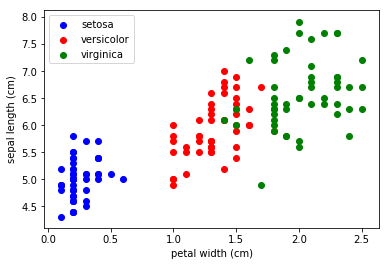

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

x_index = 3
y_index = 0

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### Loading your own dataset
There are different places where you can find data sets like Kaggle, https://archive.ics.uci.edu/ml/datasets.html.

Here, we'll be using the titanic dataset. The description can be found here: https://www.kaggle.com/c/titanic/data

In [34]:
import os
import pandas as pd

#loading the datset from .csv file
titanic = pd.read_csv(os.path.join('data', 'titanic.csv'))

#print columns
print(titanic.columns)

#labels are stored in column survived. Fetching labels.
labels = titanic.survived.values

#fetch the columns that we'll be using for our models
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked']]
data.shape


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


(1309, 5)

Let's visualize the survival rate based on the gender...

0    682
1    161
Name: survived, dtype: int64 0    127
1    339
Name: survived, dtype: int64


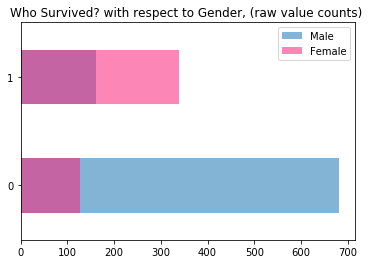

In [77]:
df_male = titanic.survived[titanic.sex == 'male'].value_counts().sort_index()
df_female = titanic.survived[titanic.sex == 'female'].value_counts().sort_index()

print(df_male, df_female)

ax1 = plt.figure()
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')


## Scikit-learn with real world data: Preprocessing

### Binning
Binning is a technique which is used to convert continuous values to discrete values for the ease of classification.

If regression is being used, continuous values can be used directly.

In [35]:
# let's have a look at ages and fares
print('age')
print(titanic['age'].head(5))
print()
print('fare')
print(titanic['fare'].head(5))
print()

#lets look at min, max, median and mean for age and fare. This will help us in deciding the bins
print('property | Age | Fare')
print('min', titanic['age'].min(), titanic['fare'].min())
print('max', titanic['age'].max(), titanic['fare'].max())
print('median', titanic['age'].median(), titanic['fare'].median())
print('mean', titanic['age'].mean(), titanic['fare'].mean())
data.shape

age
0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

fare
0    211.3375
1    151.5500
2    151.5500
3    151.5500
4    151.5500
Name: fare, dtype: float64

property | Age | Fare
min 0.1667 0.0
max 80.0 512.3292
median 28.0 14.4542
mean 29.8811345124 33.2954792813


(1309, 5)

In [36]:
#create bins for age and fare
bins_age = [0, 25, 60,  100]
bins_fare = [0, 25, 100, 1000]

age_groups = ['young', 'adult', 'senior']
fare_groups = ['low', 'medium', 'high']

data['age'] = pd.cut(titanic['age'], bins_age, labels=age_groups)
data['fare'] = pd.cut(titanic['fare'], bins_fare, labels=fare_groups)

#remove original columns
# del data['age']
# del data['fare']

data.head(5)


,pclass,sex,sibsp,parch,embarked,age,fare
0,1,female,0,0,S,adult,high
1,1,male,1,2,S,young,high
2,1,female,1,2,S,young,high
3,1,male,1,2,S,adult,high
4,1,female,1,2,S,young,high


### Converting Categorical values to Numerical values

Here we will be converting categorical values like Male/Female to numerical values like 1/2 for easier processing.

Here, we'll be using 2 different techniques:
- LabelEncoder: This is used when none of the values for this column are missing.
- factorize: This is used when there are missing values. The missing value is assigned the value of -1.

In [37]:
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.simplefilter('ignore')

#let's check the values before we change categorical values to numbers.
print(data.head(5))

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

#select only those columns that are categorical
for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = data[column].factorize()[0]

#after processing
data.head(5)

   pclass     sex  sibsp  parch embarked    age  fare
0       1  female      0      0        S  adult  high
1       1    male      1      2        S  young  high
2       1  female      1      2        S  young  high
3       1    male      1      2        S  adult  high
4       1  female      1      2        S  young  high


,pclass,sex,sibsp,parch,embarked,age,fare
0,1,0,0,0,0,0,0
1,1,1,1,2,0,1,0
2,1,0,1,2,0,1,0
3,1,1,1,2,0,0,0
4,1,0,1,2,0,1,0


### Handling missing values

There are different ways to handle missing values. Here we're using fillna() from pandas since we had categorical values. You could also use Imputer from scikit-learn to fill with mean, median etc.

In either case, we need to replace -1 with np.nan. This is needed because factorize() from above encodes missing values as -1.

Not that, imputer returns an ndarray, whereas fillna gives us a dataframe.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import numpy as np 

data = data.replace('-1', np.nan)

#try this
# imp = Imputer(strategy="median") # can supply different strategies
# imp.fit(data)
# data = imp.transform(data)

data = data.fillna(data.median()) # can try with sum, mean etc.
data.head(5)

,pclass,sex,sibsp,parch,embarked,age,fare
0,1,0,0,0,0.0,0.0,0.0
1,1,1,1,2,0.0,1.0,0.0
2,1,0,1,2,0.0,1.0,0.0
3,1,1,1,2,0.0,0.0,0.0
4,1,0,1,2,0.0,1.0,0.0


### Converting Categorical Values to Boolean Values (Binary Values)
We will be using one-hot-encoding to convert categorical features to binary features.

####What is one-hot-encoding?

When a column has categorical values, it is hard for the machine learning algorithm to train  upon. To make it more suitable for the ML algorithms, we convert each category for that column to a boolean column. Only one of the columns can take a value of one for a single sample. Hence, it is called as one hot encoding. 

(eg) Suppose you have ‘flower’ feature which can take values ‘daffodil’, ‘lily’, and ‘rose’. One hot encoding converts ‘flower’ feature to three features, ‘is_daffodil’, ‘is_lily’, and ‘is_rose’ which all are binary.

We will be using pandas' get_dummies() function which is equivalent to scikit-learn OneHotEncoder.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

Refer: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [39]:
#to convert all categorical columns to boolean columns
# data = pd.get_dummies(data)

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_data = enc.fit_transform(data).toarray()

#you can also select the columns to convert. I don't know why you would do that though!
# data = pd.get_dummies(data, columns=[ 'sex', 'embarked', 'age', 'fare'])
print('columns:', enc_data.shape[1])
print('rows:', enc_data.shape[0])

columns: 29
rows: 1309


### Scaling features 

In [40]:
from sklearn import preprocessing

processed_age_data = preprocessing.scale(data['age'])

print("The mean of the original age data is", data['age'].mean(axis=0))
print("The std  of the original age data is", data['age'].std(axis=0))
print()

print("The mean of the transformed age data is", processed_age_data.mean(axis=0))
print("The std  of the transformed age data is", processed_age_data.std(axis=0))


The mean of the original age data is 0.38884644767
The std  of the original age data is 0.536922051228

The mean of the transformed age data is 2.71406698151e-17
The std  of the transformed age data is 1.0


# Creating a Test-Train Split
Here we'll create train and test splits to train and test our algorithm.

We'll keep two sets: 1 without OneHotEncoding and one with and compare the results of the two for each algorithm.

In [41]:
#splits without encoded values. We will call this split 'A'
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=0)

#splits with encoded values. We will call this split 'B'
enc_train_data, enc_test_data, enc_train_labels, enc_test_labels = train_test_split(enc_data, labels, random_state=0)

## Algorithms we know from class

### Chance

Here we'll see a classifier that predicts labels at random.

In [42]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier("uniform")
clf.fit(train_data, train_labels)
print("Prediction accuracy:", clf.score(test_data, test_labels))

Prediction accuracy: 0.542682926829


As expected, the accuracy from chance is 50%. Let's try a better classifier

### Most Common Label Classifier

Scikit learn calls this a "dummy" classifier. Easy "baseline" for learning. Just labels all the instances with the most common/frequent label.

In [43]:
clf = DummyClassifier('most_frequent')
clf.fit(train_data, train_labels)
print("Prediction accuracy:", clf.score(test_data, test_labels))

Prediction accuracy: 0.634146341463


### SVM

More info at: http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [44]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=4000)

#train and test on split A
clf.fit(train_data, train_labels)

print(clf.coef_)
print(clf.intercept_)
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))
print()

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)

print(clf.coef_)
print(clf.intercept_)
print()
print("Prediction accuracy:", clf.score(enc_test_data, enc_test_labels))

[[-0.24091386 -1.01926197 -0.10676417 -0.00748992  0.09276051  0.0326393
  -0.06525052]]
[ 1.08556847]

Prediction accuracy: 0.786585365854

[[ 0.11105987 -0.11283395 -0.32846026  0.33539996 -0.66563429  0.54656211
   0.48331344  0.41465697  0.16695632 -0.54638545 -0.64570403 -0.74963369
   0.31757107  0.53572553  0.42170866  0.32490162 -0.07809115 -0.64545968
  -0.60329543 -0.60329496 -0.222609   -0.03532068 -0.07230466  0.01468183
   0.13990158 -0.48481775 -0.10131836 -0.0471501  -0.18176588]]
[-0.33023434]

Prediction accuracy: 0.792682926829


## Cross Validating SVM

We will be cross validating for parameter C. As you might remember from class, 'C' is the penalty parameter of the error formula.

From http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [{'C': [1e-3, 1e-2, 1e-2, 1, 10, 100, 1000, 5000]}]

print("# Tuning hyper-parameters for accuracy")
print()

clf = GridSearchCV(LinearSVC(), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(train_data, train_labels)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

#train and test by using best parameters.
clf = LinearSVC(random_state=4000, C=clf.best_params_['C'])
clf.fit(train_data, train_labels)

print(clf.coef_)
print(clf.intercept_)
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 0.01}

Grid scores on development set:

0.679 (+/-0.023) for {'C': 0.001}
0.795 (+/-0.028) for {'C': 0.01}
0.795 (+/-0.028) for {'C': 0.01}
0.792 (+/-0.028) for {'C': 1}
0.790 (+/-0.025) for {'C': 10}
0.741 (+/-0.093) for {'C': 100}
0.661 (+/-0.254) for {'C': 1000}
0.680 (+/-0.301) for {'C': 5000}

[[-0.18379599 -0.76373116 -0.06978269  0.03984783  0.1292801   0.05283752
  -0.00391419]]
[ 0.61032088]

Prediction accuracy: 0.786585365854


### Perceptron

In [46]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=2000)

#train and test on split A
clf.fit(train_data, train_labels)

print(clf.coef_)
print(clf.intercept_)
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)

print(clf.coef_)
print(clf.intercept_)
print()
print("Prediction accuracy:", clf.score(enc_test_data, enc_test_labels))


[[ -6. -13.  -1.  -1.   2.   0.  -3.]]
[ 12.]

Prediction accuracy: 0.725609756098
[[ 3. -1. -3.  1. -2.  2.  1.  4.  1. -4. -2. -3.  0.  3.  2.  3. -2. -4.
  -2. -1. -3.  2.  0. -1.  2. -2.  0.  2. -3.]]
[-1.]

Prediction accuracy: 0.762195121951


### Decision Tree


In [47]:
#http://scikit-learn.org/stable/modules/tree.html
#for visualization

import graphviz 
from sklearn import tree

#for windows, uncomment the following and replace with path of you local Graphviz.38/bin. Include path of bin and not python lib
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [48]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_enc')

Accuracy 0.795731707317
The depth of this tree is 11
Accuracy 0.801829268293
The depth of this tree is 10


'graphs/dt_gini_enc.pdf'

We can try using a different criterion to build the tree.

In [49]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy')

clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_entropy_enc')


Accuracy 0.795731707317
The depth of this tree is 11
Accuracy 0.801829268293
The depth of this tree is 11


'graphs/dt_entropy_enc.pdf'

Let's try limiting the depth and visualize our tree...

http://scikit-learn.org/stable/modules/tree.html

Accuracy 0.786585365854
The depth of this tree is 2


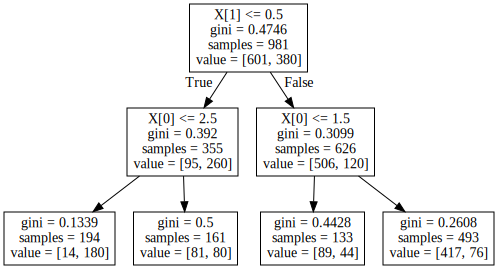

In [50]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_data, train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(test_data, test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit')
graph

Accuracy 0.786585365854
The depth of this tree is 2


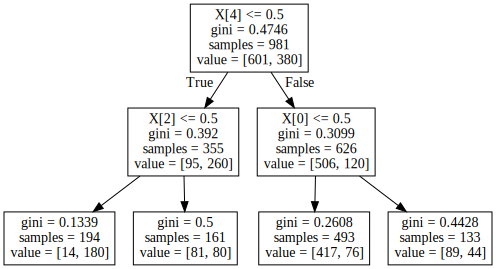

In [51]:
# clf.tree_.__getstate__()
clf.fit(enc_train_data, enc_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(enc_test_data, enc_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)

graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph.render('graphs/dt_gini_limit_enc')
graph

### Random Forest

Here we'll be training a random forest. Try modifying the parameters and see how it affects the accuracy

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=35, criterion='gini')
clf.fit(train_data, train_labels)
print(clf.feature_importances_)
print()
print("Prediction accuracy:", clf.score(test_data, test_labels))

[ 0.16405715  0.51632839  0.07169227  0.07324637  0.04818935  0.0360459
  0.09044058]

Prediction accuracy: 0.817073170732


## Other algorithms we haven't covered in class

- Logistic Regression
- Naive Bayes
- Adaboost
- K Nearest Neighbors
- Multiclass classifiers
- SVM with Kernels

### Logistic Regression

Try you hands at logistic regression.

In [56]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

#train and test on split A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

Prediction Accuracy: 0.786585365854
Prediction Accuracy: 0.798780487805


### Adaboost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=75)

#train and test on split A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

Prediction Accuracy: 0.77743902439
Prediction Accuracy: 0.77743902439


### K Nearest classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=10)

#train and test on split A
clf.fit(train_data, train_labels)
print('Prediction Accuracy:', clf.score(test_data, test_labels))

#train and test on split B
clf.fit(enc_train_data, enc_train_labels)
print('Prediction Accuracy:', clf.score(enc_test_data, enc_test_labels))

Prediction Accuracy: 0.786585365854
Prediction Accuracy: 0.765243902439


### Multi-class classification

We come back to iris dataset and use some techniques of multi-class classification.

In [78]:
iris_train_data, iris_test_data, iris_train_labels, iris_test_labels = train_test_split(iris.data, iris.target, random_state=0)

In [83]:
#one-vs-all
clf = LinearSVC(random_state=4000, multi_class='ovr')

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

[[ 0.21778851  0.39842839 -0.83300604 -0.41992389]
 [ 0.02740751 -0.8073061   0.39147845 -0.90817539]
 [-1.0857822  -0.78188083  1.61119245  1.5016092 ]]
[ 0.10834681  1.50925848 -1.25388388]

Prediction accuracy: 0.921052631579



In [85]:
#one-vs-one
from sklearn.svm import SVC

clf = SVC(random_state=4000)

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

Prediction accuracy: 0.973684210526


In [84]:
#multi-class
clf = LinearSVC(random_state=4000, multi_class='crammer_singer')

clf.fit(iris_train_data, iris_train_labels)

print("Prediction accuracy:", clf.score(iris_test_data, iris_test_labels))

[[ 0.6658878   0.66124633 -1.34269411 -0.77806764]
 [ 0.25580283  0.20927604 -0.2497384  -0.69496671]
 [-0.92169063 -0.87052237  1.59243251  1.47303435]]
[ 0.27130358  0.87549591 -1.14679949]

Prediction accuracy: 0.973684210526



Accuracy 0.973684210526
The depth of this tree is 4


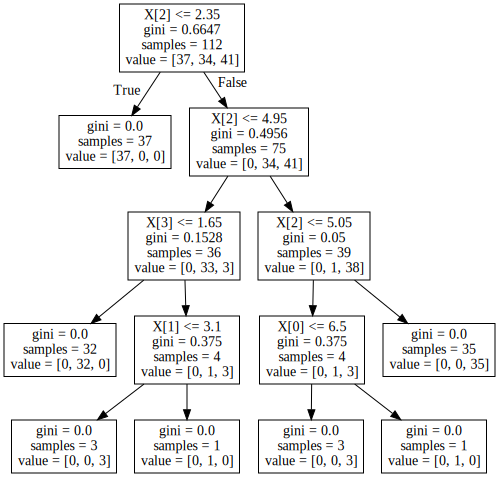

In [87]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(iris_train_data, iris_train_labels)
DecisionTreeClassifier()

print("Accuracy", clf.score(iris_test_data, iris_test_labels))
print("The depth of this tree is", clf.tree_.max_depth)


graph = graphviz.Source(tree.export_graphviz(clf, out_file=None)) 
graph

### Links!
- Scikit learn official page: http://scikit-learn.org/stable/index.html

- Pandas official page: http://pandas.pydata.org/pandas-docs/stable/index.html

- lots of scikit demos: https://github.com/amueller/scipy-2016-sklearn/tree/master/notebooks

- svm documentation: http://scikit-learn.org/stable/modules/svm.html

- decision tree documentation: http://scikit-learn.org/stable/modules/tree.html

- perceptron documentation: http://scikit-learn.org/stable/modules/linear_model.html#perceptron

- graphing trees: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- cross-validation parameter search documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py